In [1]:
import pandas as pd

In [2]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as plticker
from matplotlib.colors import LogNorm


def plots_with_1_level(group_x):

    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow),sharex=True,sharey=True) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()),axes.flatten()):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        #given_group2 = given_group_level_1.groupby(['order_diff', 'category']).mean().groupby(level=2)['exp'].plot(ax=ax)
        given_group2 = given_group_level_1.groupby([group_x]).mean()['exp'].plot(ax=ax)
        given_group2 = given_group_level_1.groupby([group_x]).mean()['exp (GK)'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP063477'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP026208'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP115956'].plot(ax=ax)

        ax.axhline(y=0.5, color='r', linestyle='-')
        #ax.set_xlim([0, 2000])
        ax.legend()
        rects = ax.patches  
        ax.set_title('%s' %(key_level_1))
        #ax.set_ylabel('%Population')
        ax.set_xlabel('Distance between gene pairs (MB)')
        ax.set_ylabel('Co-expression')
        

def plots_with_2_groups(group_2='None', group_3_x='category'):   
    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    change_group_level_2 = df_2_or_uniq.groupby([group_2])
    nrow = len(change_group_level_1.groups.keys())
    ncol = len(change_group_level_2.groups.keys())
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(8*ncol, 8*nrow),sharey=True) 

    for key_level_1,ax_row in zip(sorted_nicely(change_group_level_1.groups.keys()) ,axes):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        change_group = given_group_level_1.groupby([group_2])
        for key,ax in zip(change_group.groups.keys(),ax_row):
            given_group = change_group.get_group(key)
            #given_group2 = given_group.groupby([group_3_x, 'category']).mean().groupby(level=1)['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp_georg'].plot(ax=ax)
            ax.legend()
            rects = ax.patches  
            ax.set_title('%s, %s' %(key_level_1,key))
            ax.axhline(y=0.5, color='r', linestyle='-')
            ax.set_ylabel('%Population')
            ax.set_ylim([0.3, 0.9])
            
            
def plots_with_2_groups_same_plot(group_2='None', group_3_x='category'):   
    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    change_group_level_2 = df_2_or_uniq.groupby([group_2])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow),sharey=True, sharex=True) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()) ,axes.flatten()):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        change_group = given_group_level_1.groupby([group_2])
        for key in change_group.groups.keys():
            given_group = change_group.get_group(key)
            #given_group2 = given_group.groupby([group_3_x, 'category']).mean().groupby(level=1)['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp'].plot(ax=ax)
            #given_group2 = given_group.groupby([group_3_x]).mean()['exp_georg'].plot(ax=ax)
            #ax.legend()
            rects = ax.patches  
            ax.set_title('%s, %s' %(key_level_1,key))
            ax.axhline(y=0.5, color='r', linestyle='-')
    ax.set_ylabel('Co-expression')
    ax.set_xlabel('Distance between gene pairs (MB)')
    #ax.set_ylim([0.3, 0.9])
            

def plots_with_1_level_3d(df, group_x):
    change_group_level_1 = df.groupby(['chrom_x'])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow)) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()),axes.flatten()):
            given_group_level_1 = change_group_level_1.get_group(key_level_1)
            H = given_group_level_1.pivot_table(index='gene_order_tss_x', columns='gene_order_tss_y', values=group_x)
            #print (H)
            print ((H - H.T).max().max())
            #H.mask(H < 0, inplace=True)
            #elix.reset_index(drop=True, inplace=True)
            print (H.max())
            vmax= 10000
            cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'red'), (1./2, 'white'), (vmax / vmax, 'blue')])
            current_cmap = cmap
            current_cmap.set_bad(color='grey')
            #      vmax= 1000000
            #      current_cmap = LinearSegmentedColormap.from_list('mycmap', [ (0/ vmax, 'white'), (vmax / vmax, 'blue')])
            #      imgp = ax.imshow(H.T,origin='low', aspect='auto' , cmap=current_cmap, norm=LogNorm(vmin=1, vmax=vmax))
            
            imgp = ax.imshow(H,origin='low', aspect='auto' , vmin=100, vmax=vmax, cmap=current_cmap)
            #imgp = ax.imshow(H,origin='low', aspect='auto' , norm=LogNorm(), cmap=current_cmap)
            #sns.heatmap(H, annot = False) 
            ax.set_title('%s' %(key_level_1))
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_xlabel("Genes in chromosome order")
            ax.set_ylabel("Genes in chromosome order")
            
    cbar = ax.figure.colorbar(imgp, ax=ax)

In [10]:
df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/11_dist_with_georg_hic_sub_median_hic_500.h5')

In [499]:
df_2_or = df_2_or[df_2_or['exp_georg'] >= 0] 

0.0
gene_order_tss_y
6       18171.0
9       11136.0
11      14490.0
12      14490.0
14      14490.0
         ...   
3345     6781.0
3347     6746.0
3348     6746.0
3349     5868.0
3355     5847.0
Length: 1004, dtype: float64


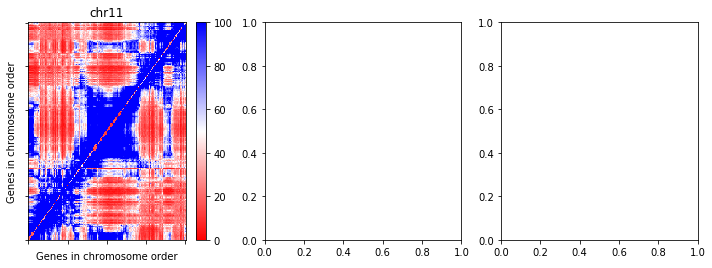

In [72]:
plots_with_1_level_3d(df_2_or, 'hi-c-rao')

0.0
gene_order_tss_y
6       30508.0
9       30508.0
11      30508.0
12      30508.0
14      30508.0
         ...   
3345    23677.0
3347    23677.0
3348    23677.0
3349    23677.0
3355    78596.0
Length: 1004, dtype: float64


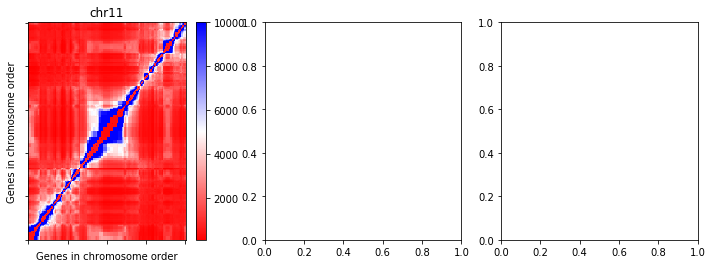

In [94]:
plots_with_1_level_3d(df_2_or_2, 'hi-c-rao')

0.0
gene_order_tss_y
6       0.999501
9       0.999501
11      0.999501
12      0.999501
14      0.999501
          ...   
3345    0.999501
3347    0.999501
3348    0.999501
3349    0.999501
3355    0.999501
Length: 1004, dtype: float64


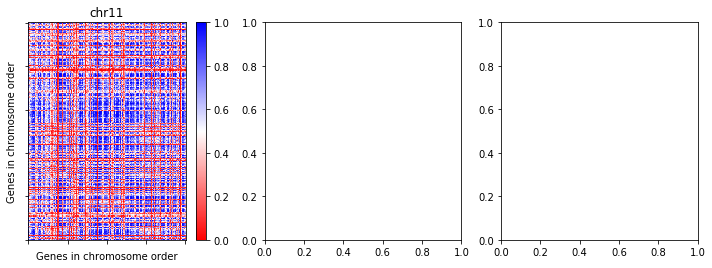

In [62]:
from lohia_utilities.create_corr_network import rank
df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0] 
ranked_matirx = rank(df_2_or['exp'])
df_2_or['exp'] = ranked_matirx
plots_with_1_level_3d(df_2_or,'exp')

0.0
gene_order_tss_y
6       0.999501
9       0.999501
11      0.999501
12      0.999501
14      0.999501
          ...   
3345    0.999501
3347    0.999501
3348    0.999501
3349    0.999501
3355    0.999501
Length: 1004, dtype: float64


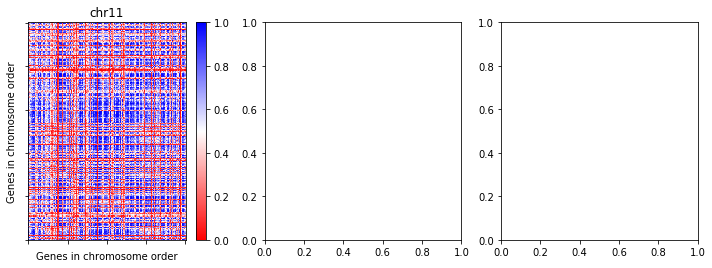

In [63]:
from lohia_utilities.create_corr_network import rank
df_2_or_2 = df_2_or_2[df_2_or_2['hi-c-rao'] >= 0] 
ranked_matirx = rank(df_2_or_2['exp'])
df_2_or_2['exp'] = ranked_matirx
plots_with_1_level_3d(df_2_or_2,'exp')

0.0
gene_order_tss_y
6       0.883556
9       0.883556
11      0.883556
12      0.883556
14      0.883556
          ...   
3345    0.943445
3347    0.943445
3348    0.943445
3349    0.943445
3355    0.943445
Length: 1293, dtype: float64


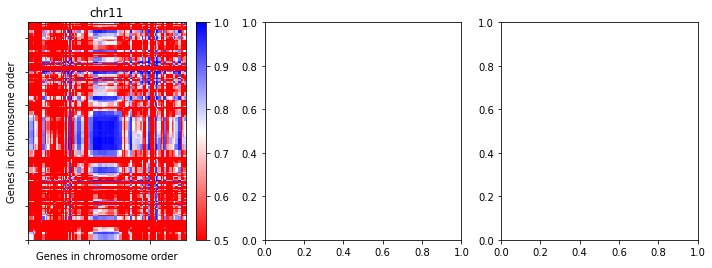

In [592]:
ranked_matirx = rank(df_2_or['exp_median'])
df_2_or['exp_median'] = ranked_matirx
plots_with_1_level_3d(df_2_or,'exp_median')

In [11]:
resoultion=500

In [12]:
df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_dist_with_georg_hic_sub_median_hic_%s.h5' %resoultion)

In [13]:
df_2_or = df_2_or[['tss_tss', 'exp', 'hi-c-rao', 'Gene stable ID_x', 'Gene stable ID_y', 'chrom_x','gene_order_tss_x', 'gene_order_tss_y']]
df_2_or['hi-c-rao'].isnull().astype(int).sum() / df_2_or.shape[0]
df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0] 

In [ ]:
import itertools
change_group_level_1 = df_2_or.groupby(['chrom_x'])
matrix_all_dist = []
for chrm in change_group_level_1.groups.keys():
    print (chrm)
    df_chr = change_group_level_1.get_group(chrm)
    df_chr['pairs'] = [x+"_"+y for x,y in zip(df_chr['Gene stable ID_y'], df_chr['Gene stable ID_x'])]
    df_chr.set_index('pairs', inplace=True)
    unique_genes = list(set(df_chr['Gene stable ID_x'].unique()))
    gene_resolution_pairs= {}
    for each_gene in  unique_genes:
        gene_resolution_pairs[each_gene] = df_chr[(df_chr['Gene stable ID_x'] == each_gene) & (df_chr['tss_tss'] <=resoultion * 1000)]['Gene stable ID_y'].to_list()
    counter = 0
    for pairs in itertools.combinations(unique_genes, 2):
        index_list = [r[0]+ '_' + r[1] for r in itertools.product(gene_resolution_pairs[pairs[0]], gene_resolution_pairs[pairs[1]])] 
        df_chr.at[index_list, 'exp_mean'] = df_chr.loc[index_list,:]['exp'].mean()
        df_chr.at[index_list, 'exp_median'] = df_chr.loc[index_list,:]['exp'].median()
        index_list = [r[0]+ '_' + r[1] for r in itertools.product(gene_resolution_pairs[pairs[1]], gene_resolution_pairs[pairs[0]])] 
        df_chr.at[index_list, 'exp_mean'] = df_chr.loc[index_list,:]['exp'].mean()
        df_chr.at[index_list, 'exp_median'] = df_chr.loc[index_list,:]['exp'].median()
    matrix_all_dist.append(df_chr)
prot_list = pd.concat(matrix_all_dist)    
    

chr1


/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [ ]:
counter = 0
for pairs in itertools.combinations(unique_genes, 2):
    counter = counter +1 
    index_list = [r[0]+ '_' + r[1] for r in itertools.product(gene_resolution_pairs[pairs[0]], gene_resolution_pairs[pairs[1]])] 
    if counter == 1000:
        print (counter)
    df_2_or.at[index_list, 'exp_mean'] = df_2_or.loc[index_list,:]['exp'].mean()
    index_list = [r[0]+ '_' + r[1] for r in itertools.product(gene_resolution_pairs[pairs[1]], gene_resolution_pairs[pairs[0]])] 
    df_2_or.at[index_list, 'exp_mean'] = df_2_or.loc[index_list,:]['exp'].mean()

1000


In [ ]:
        matrix_all_dist.append(df_2_or)
    prot_list = pd.concat(matrix_all_dist)

In [ ]:
df_2_or_u = df_2_or[df_2_or['Gene stable ID_x'] != df_2_or['Gene stable ID_y']]

(0, 500)

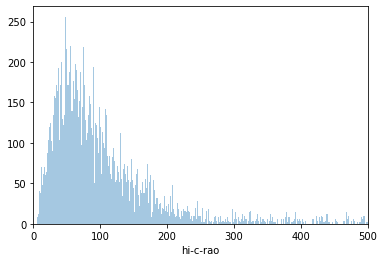

In [275]:
import seaborn as sns
ax = sns.distplot(df_2_or_u['hi-c-rao'], bins=10000, hist=True, kde=False, hist_kws={"range":(1, 10000)})
#ax.set_ylim(0, 500)
ax.set_xlim(0, 500)

In [600]:
# import numpy as np
import pandas as pd
import warnings
from lohia_utilities.calculate_auc import *
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from lohia_utilities.create_corr_network import rank

#df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/11_dist_with_georg_hic_sub_median_hic_500.h5')

#df_2_or = df_2_or[df_2_or['exp_georg'] >= 0] # liming the matrix to only chosen values for rank standerization
#df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0] # liming the matrix to only chosen values for rank standerization
df_2_or_u = df_2_or[df_2_or['Gene stable ID_x'] != df_2_or['Gene stable ID_y']]
#ranked_matirx = rank(df_2_or['exp_georg'])
#df_2_or['exp_georg'] = ranked_matirx
#df_2_or.rename(columns={"exp_georg": "exp (GK)"}, inplace=True)

ranked_matirx = rank(df_2_or['exp'])
df_2_or['exp'] = ranked_matirx

#ranked_matirx = rank(df_2_or['hi-c-rao'])
#df_2_or['hi-c-rao'] = ranked_matirx
m_l = []
change_group_level_1 = df_2_or.groupby(['chrom_x'])
for chrm in change_group_level_1.groups.keys():
    df = change_group_level_1.get_group(chrm)
    num_pairs = df['Gene stable ID_x'].nunique()

    prot_list_sp = np.array_split(df, num_pairs, axis=0)
    for i in range(0,num_pairs):

        long_form_top = prot_list_sp[int(i)]
        long_form_top['dist'] = long_form_top['hi-c-rao']
        long_form_top = long_form_top[long_form_top['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization

        long_form_top = long_form_top[long_form_top['Gene stable ID_x'] != long_form_top['Gene stable ID_y']] # remove all the self pairs from each set
        long_form_top['hi-c-rao'].fillna(-1, inplace=True)
        mp =  long_form_top['Gene stable ID_y'].values[0]
        #print (long_form_top.shape)
        
        exp_median = long_form_top['exp'].median()
        exp_mean = long_form_top['exp'].mean()
        exp_var = long_form_top['exp'].var()

        long_form_top = long_form_top.reset_index()
        if long_form_top['exp'].values[0] >=0:
    
       

            for dist_thresh in [1,5,10,100,int(num_pairs/2),700]:
            #for dist_thresh in [100000,1000000,10000000,100000000]:
            #for dist_thresh in [4000]:
            #for dist_thresh in [df_2_or_u["hi-c-rao"].min(), df_2_or["hi-c-rao"].max()-1, df_2_or["hi-c-rao"].mean(), df_2_or["hi-c-rao"].median()]:
                #long_form_top["True_sim"] = [1 if score > dist_thresh else 0 for score in long_form_top["dist"]]  
                
                long_form_top = long_form_top.sort_values(by=['dist'], ascending=False) 
                long_form_top["True_sim"] = [0 if score > dist_thresh else 0 for score in long_form_top["dist"]]  
                for ind_val in long_form_top.index.values[0:dist_thresh]:
                    long_form_top.at[ind_val, 'True_sim'] = 1
                    
                #long_form_top = long_form_top.sort_values(by=['dist'], ascending=True) 
                #long_form_top["True_sim"] = [1 if score > dist_thresh else 1 for score in long_form_top["dist"]]  
                #for ind_val in long_form_top.index.values[0:dist_thresh]:
                #    long_form_top.at[ind_val, 'True_sim'] = 0
                #
                #long_form_top["True_sim"] = [1 if score <= dist_thresh else 0 for score in long_form_top["dist"]] 
                #long_form_top["True_sim"] = [1 if score >= dist_thresh else 1 if score2 <= 1000 else 0 for score, score2 in zip(long_form_top["dist"],long_form_top["tss_tss"])]    
                long_form_top["true_pos"] = [score for score in long_form_top["True_sim"]]
                long_form_top["true_neg"] = [1 if score==0 else 0 for score in long_form_top["True_sim"]]
                long_form_top["predicted_sim_from_exp"] = [score for score in long_form_top["exp_median"]]
                ca = calc_auroc (long_form_top,predicted_score='predicted_sim_from_exp')
                m_curve = calc_auc_curve (long_form_top,predicted_score='predicted_sim_from_exp')
                pr_curve = prec_recall (long_form_top,predicted_score='predicted_sim_from_exp')

                tpd = pd.DataFrame(m_curve)
                if m_curve:
                    tpd[0] =  tpd[0].astype(float).round(2)
                    tpd = tpd.groupby([0]).mean()
                    m_curve  = dict(zip(tpd.index, tpd[1]))
                else:
                    m_curve  = {}
                tpd = pd.DataFrame(pr_curve)
                if pr_curve:
                    tpd[0] =  tpd[0].astype(float).round(2)
                    tpd = tpd.groupby([0]).mean()
                    pr_curve  = dict(zip(tpd.index, tpd[1]))
                else:
                    pr_curve  = {}
                m_l.append((chrm, num_pairs,dist_thresh, ca, m_curve, pr_curve, long_form_top["true_pos"].sum(), long_form_top["true_neg"].sum(), exp_median, exp_mean, exp_var, mp))
        else:
            pass

df_scores = pd.DataFrame(m_l, columns =['chrm', 'num_pairs','dist_thresh',  'auc', 'plot', 'pr_curve', 'true_pos', 'true_neg', 'exp_median', 'exp_mean', 'exp_var', 'Gene stable ID'])
df_scores.to_hdf('/data/lohia/gene_distance_expresseion/dist_files/chr11_100kb.h5', key='df', mode='w')    

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


In [601]:
df_scores = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/chr11_100kb.h5')

In [493]:
df_scores

chrm  num_pairs  dist_thresh       auc  \
0     chr11       1004         4000       NaN   
1     chr11       1004         4000       NaN   
2     chr11       1004         4000       NaN   
3     chr11       1004         4000       NaN   
4     chr11       1004         4000  0.561063   
...     ...        ...          ...       ...   
999   chr11       1004         4000       NaN   
1000  chr11       1004         4000  0.820235   
1001  chr11       1004         4000       NaN   
1002  chr11       1004         4000  0.427163   
1003  chr11       1004         4000       NaN   

                                                   plot  \
0     {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....   
1     {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....   
2     {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....   
3     {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....   
4     {0.0: 0.0, 0.01: 0.0, 0.02: 0.0104166666666666...   
...                                                 ...   
999   {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....   
1000  {0.0: 0.0, 0.01: 0.0, 0.02: 0.0, 0.03: 0.0, 0....   
1001  {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....   
1002  {0.0: 0.0, 0.01: 0.0, 0.02: 0.0, 0.03: 0.01739...   
1003  {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....   

                                               pr_curve  true_pos  true_neg  \
0                                                    {}         0       650   
1                                                    {}         0       932   
2                                                    {}         0       647   
3                                                    {}         0       828   
4     {0.0: 0.0, 0.08: 0.021899579772188874, 0.17: 0...        12       696   
...                                                 ...       ...       ...   
999                                                  {}         0       896   
1000  {0.0: 0.0, 0.33: 0.011573465587966434, 0.67: 0...         3       738   
1001                                                 {}         0       646   
1002  {0.0: 0.0, 0.04: 0.03137291143578475, 0.09: 0....        23       913   
1003                                                 {}         0       647   

      exp_median  exp_mean   exp_var   Gene stable ID  
0       0.592583  0.547375  0.063044  ENSG00000174669  
1       0.732026  0.656574  0.070272  ENSG00000183340  
2       0.392391  0.379631  0.036577  ENSG00000182791  
3       0.822697  0.728352  0.067169  ENSG00000132275  
4       0.650224  0.608971  0.084299  ENSG00000168496  
...          ...       ...       ...              ...  
999     0.710174  0.617268  0.067416  ENSG00000151702  
1000    0.580503  0.522850  0.076284  ENSG00000156587  
1001    0.653405  0.605870  0.066594  ENSG00000173715  
1002    0.657461  0.592015  0.051981  ENSG00000166086  
1003    0.728689  0.649545  0.071352  ENSG00000239306  

[1004 rows x 12 columns]

In [595]:
df_scores[df_scores['dist_thresh'] == 4000]['auc'].isnull().astype(int).sum()

803

In [220]:
df_scores[df_scores['dist_thresh'] == 2000]

chrm  num_pairs  dist_thresh  auc  \
4     chr16        773         2000  NaN   
9     chr16        773         2000  NaN   
14    chr16        773         2000  NaN   
19    chr16        773         2000  NaN   
24    chr16        773         2000  NaN   
...     ...        ...          ...  ...   
3844  chr16        773         2000  NaN   
3849  chr16        773         2000  NaN   
3854  chr16        773         2000  NaN   
3859  chr16        773         2000  NaN   
3864  chr16        773         2000  NaN   

                                                   plot pr_curve  true_pos  \
4     {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   
9     {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   
14    {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   
19    {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   
24    {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   
...                                                 ...      ...       ...   
3844  {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   
3849  {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   
3854  {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   
3859  {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   
3864  {0.0: nan, 0.01: nan, 0.02: nan, 0.03: nan, 0....       {}         0   

      true_neg  exp_median  exp_mean   exp_var   Gene stable ID  
4          495    0.345003  0.322651  0.030117  ENSG00000245694  
9          496    0.619299  0.585025  0.087750  ENSG00000245694  
14         437    0.486055  0.477094  0.069154  ENSG00000198931  
19         420    0.554352  0.556762  0.077769  ENSG00000243716  
24         428    0.828832  0.726001  0.064853  ENSG00000168434  
...        ...         ...       ...       ...              ...  
3844       428    0.425241  0.405120  0.049482  ENSG00000260807  
3849       432    0.490119  0.454270  0.064232  ENSG00000169627  
3854       442    0.474922  0.465165  0.052825  ENSG00000248124  
3859       494    0.360949  0.368468  0.032043  ENSG00000102935  
3864       495    0.572479  0.551079  0.061528  ENSG00000177200  

[773 rows x 12 columns]

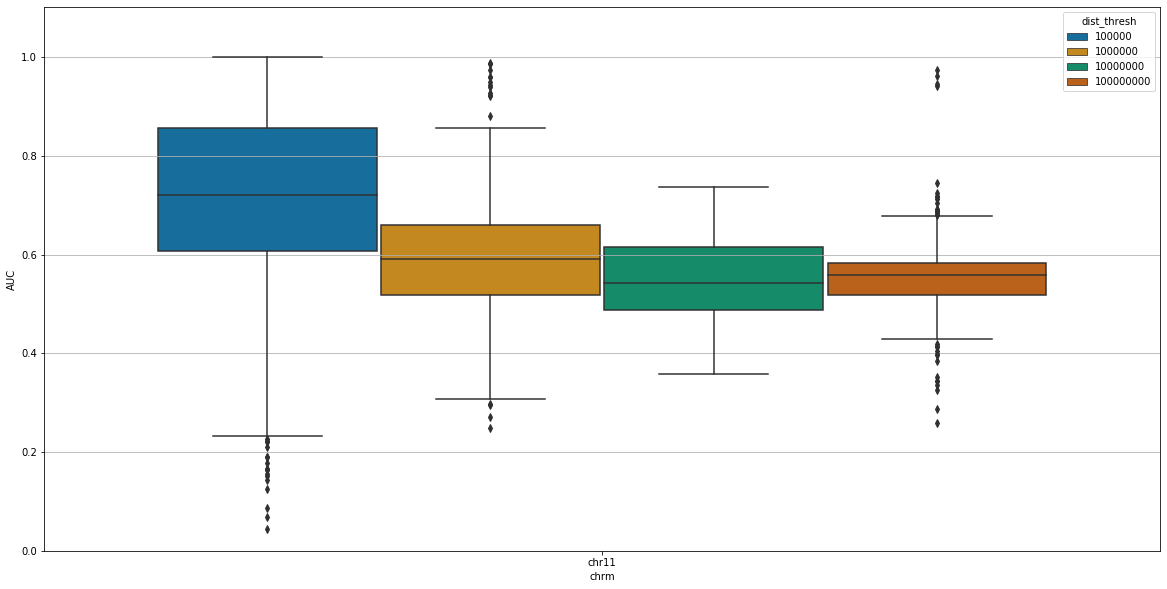

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

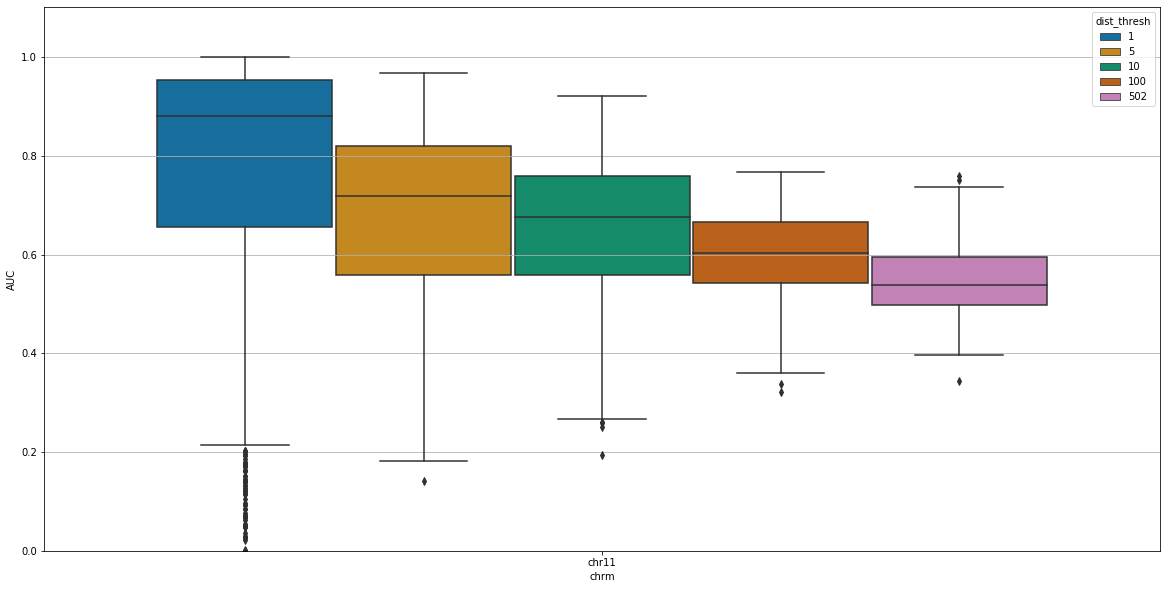

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

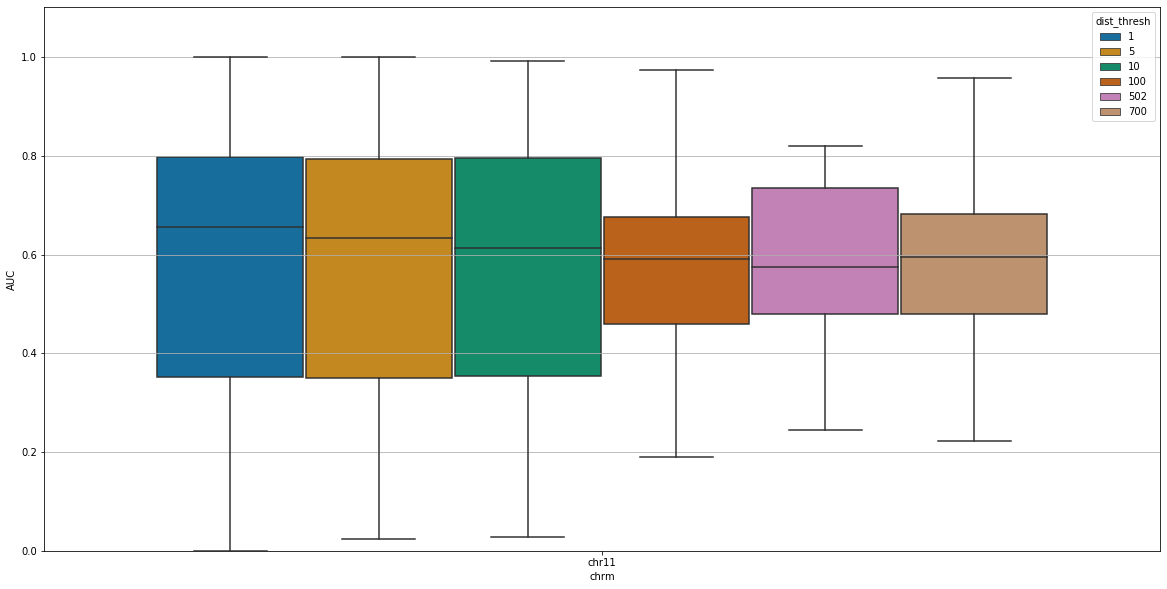

In [602]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

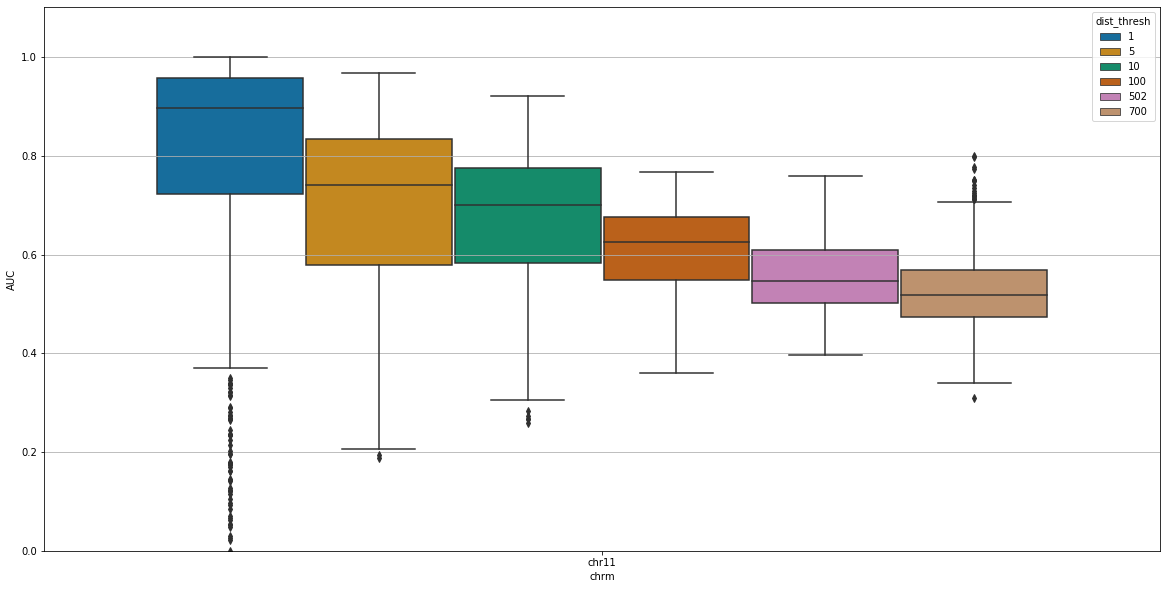

In [414]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

In [149]:
df_scores_plot = pd.concat([df_scores.drop(['plot'], axis=1), df_scores['plot'].apply(pd.Series)], axis=1)
df_plot = df_scores_plot.groupby(['chrm']).median()

In [143]:
df_scores['plot']

0       {0.0: 0.15891472868217105, 0.1: 0.358914728682...
1       {0.0: 0.19172932330827042, 0.1: 0.479591836734...
2       {0.0: 0.027435610302351626, 0.1: 0.14389697648...
3       {0.0: 0.03850267379679142, 0.1: 0.107486631016...
4       {0.0: 0.3575498575498566, 0.1: 0.7236467236467...
                              ...                        
999     {0.0: 0.0858757062146893, 0.1: 0.3598870056497...
1000    {0.0: 0.09021739130434761, 0.1: 0.192391304347...
1001    {0.0: 0.03621346886912323, 0.1: 0.156289707750...
1002    {0.0: 0.09125188536953226, 0.1: 0.208898944193...
1003    {0.0: 0.06352459016393448, 0.1: 0.174863387978...
Name: plot, Length: 1004, dtype: object

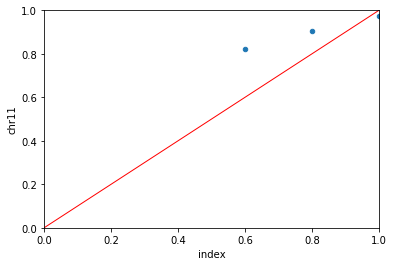

In [150]:
for thresh in df_plot.index.tolist():
    axes = df_plot.T.reset_index()[11::].plot.scatter(x='index', y=thresh)
    #axes = zt.reset_index().plot.scatter(x='x_p', y=0, s=1)
    #axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #axes = df_plot.T.reset_index().plot(x='index', y=0.3)
    axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
    #axes.set_title('Predicting structure similarity from expression')
    #axes.yaxis.grid(True)
    #axes.set_xlabel('Co-expression')
    #axes.set_ylabel('AUC')
    #axes.set_ylim([0.0,1.101])
    #plt.setp(bp['fliers'], markersize=3.0)
    #0.5
    #fig, axes = plt.subplots()
    #axes.scatter(x, y)
    #axes.plot(x, y)
    axes.set_ylim([0,1])
    axes.set_xlim([0,1])

    #plt.show()
    plt.show()

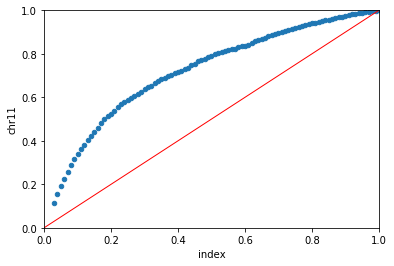

In [258]:
for thresh in df_plot.index.tolist():
    axes = df_plot.T.reset_index()[11::].plot.scatter(x='index', y=thresh)
    #axes = zt.reset_index().plot.scatter(x='x_p', y=0, s=1)
    #axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #axes = df_plot.T.reset_index().plot(x='index', y=0.3)
    axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
    #axes.set_title('Predicting structure similarity from expression')
    #axes.yaxis.grid(True)
    #axes.set_xlabel('Co-expression')
    #axes.set_ylabel('AUC')
    #axes.set_ylim([0.0,1.101])
    #plt.setp(bp['fliers'], markersize=3.0)
    #0.5
    #fig, axes = plt.subplots()
    #axes.scatter(x, y)
    #axes.plot(x, y)
    axes.set_ylim([0,1])
    axes.set_xlim([0,1])

    #plt.show()
    plt.show()

In [154]:
df_scores_plot

chrm  num_pairs  dist_thresh       auc  \
0     chr11       1004          2.0  0.603357   
1     chr11       1004          1.0  0.950000   
2     chr11       1004          1.0  0.990826   
3     chr11       1004          2.0  0.964930   
4     chr11       1004          5.0  0.937400   
...     ...        ...          ...       ...   
999   chr11       1004          2.0  0.074297   
1000  chr11       1004          6.0  0.426445   
1001  chr11       1004          6.0  0.650485   
1002  chr11       1004          6.0  0.793478   
1003  chr11       1004          6.0  0.855932   

                                               pr_curve  true_pos  true_neg  \
0     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       566         2   
1     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       480         1   
2     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       436         1   
3     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       499         2   
4     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       623         2   
...                                                 ...       ...       ...   
999   {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       498         1   
1000  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       571         2   
1001  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       618         1   
1002  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       552         3   
1003  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       472         1   

      exp_median  exp_mean   exp_var  ... 0.82  0.83  0.85  0.86  0.88  0.89  \
0       0.818331  0.709948  0.077252  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1       0.711796  0.638367  0.072380  ...  NaN   NaN   NaN   NaN   NaN   NaN   
2       0.680995  0.613632  0.075320  ...  NaN   NaN   NaN   NaN   NaN   NaN   
3       0.690213  0.630627  0.070869  ...  NaN   NaN   NaN   NaN   NaN   NaN   
4       0.712888  0.625489  0.079132  ...  NaN   NaN   NaN   NaN   NaN   NaN   
...          ...       ...       ...  ...  ...   ...   ...   ...   ...   ...   
999     0.061497  0.109356  0.028743  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1000    0.264574  0.274264  0.040111  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1001    0.480949  0.495839  0.064536  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1002    0.684659  0.632675  0.075314  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1003    0.745523  0.660855  0.078882  ...  NaN   NaN   NaN   NaN   NaN   NaN   

      0.9  0.91  0.92       1.0  
0     NaN   NaN   NaN  0.863074  
1     NaN   NaN   NaN  0.975000  
2     NaN   NaN   NaN  0.995413  
3     NaN   NaN   NaN  0.994990  
4     NaN   NaN   NaN  0.981541  
...   ...   ...   ...       ...  
999   NaN   NaN   NaN  0.537149  
1000  NaN   NaN   NaN  0.834501  
1001  NaN   NaN   NaN  0.825243  
1002  NaN   NaN   NaN  0.987319  
1003  NaN   NaN   NaN  0.927966  

[1004 rows x 66 columns]

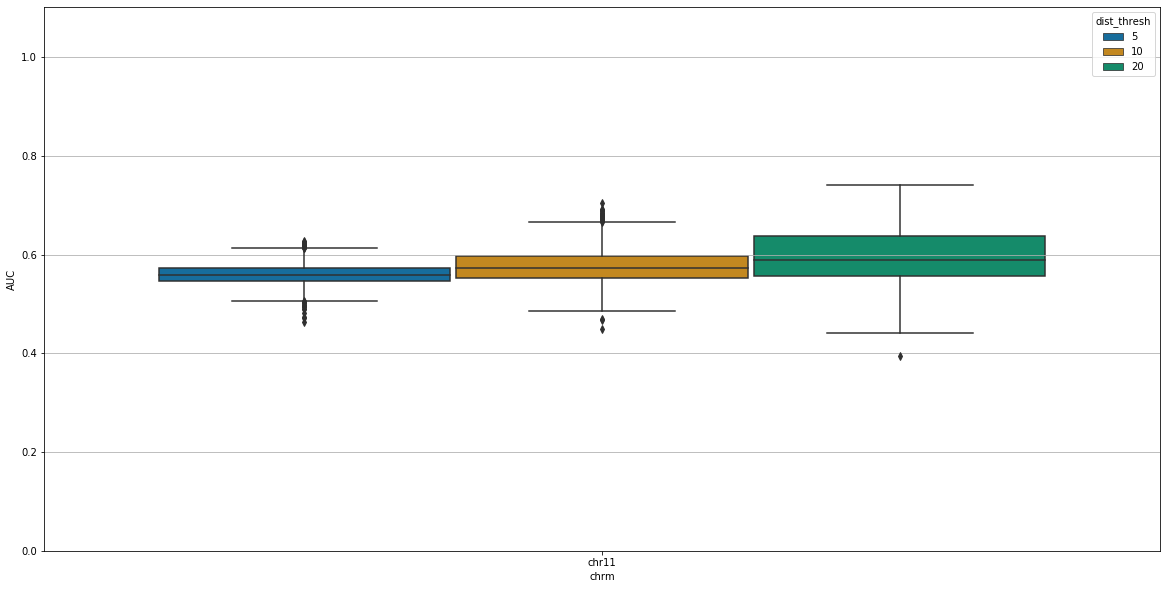

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind",
                 hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()